## Agglomaretive Clustering - Hierchical Clustering

In [1]:
import numpy as np

X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

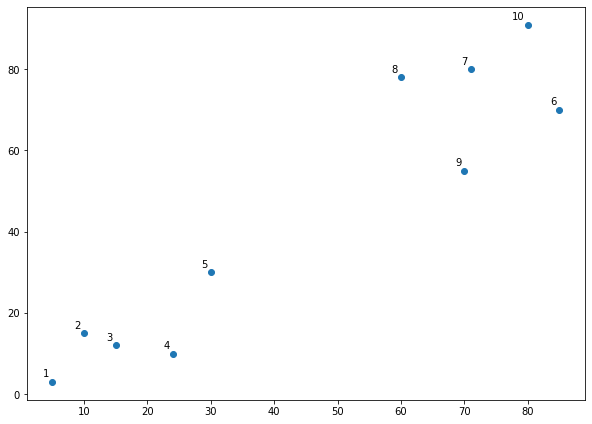

In [2]:
import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

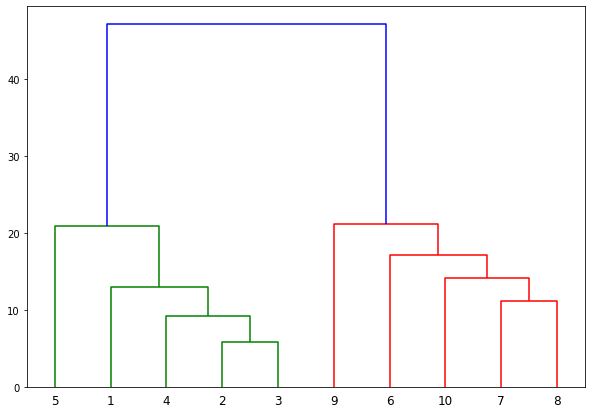

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single') # other options are - ward, average

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [8]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([0, 0, 0, 0, 0, 2, 1, 1, 2, 1])

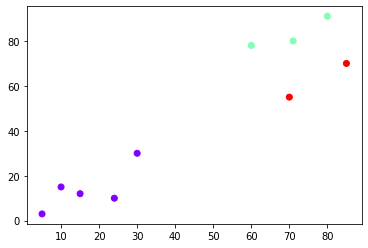

In [9]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

### New Data

In [11]:
import pandas as pd

customer_data = pd.read_csv('hc_data.csv')

In [12]:
customer_data.shape

(200, 5)

In [13]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
data = customer_data.iloc[:, 3:5].values

In [21]:
data.shape

(200, 2)

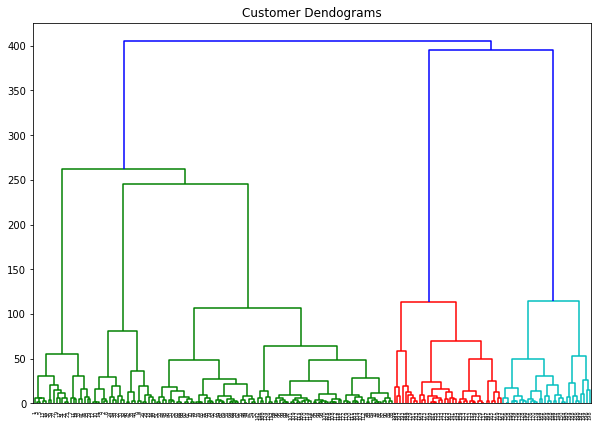

In [15]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [17]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

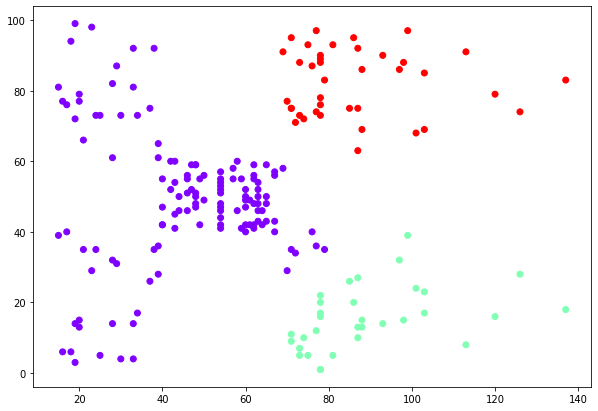

In [20]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

## DBScan

In [22]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

In [35]:
X, y = make_moons(n_samples=1000, noise= 0.05)

In [34]:
X.shape

(1000, 2)

In [52]:

dbscan = DBSCAN(eps = 0.05, min_samples=3)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

In [53]:
dbscan.labels_

array([ 0,  1,  1,  2,  3, -1,  4,  0,  5,  4,  0,  0,  1,  1,  0,  1,  0,
        5,  5,  3,  0,  4,  3,  5,  1, -1, -1,  1, -1,  5,  5,  4,  1,  0,
        0,  0,  3,  3,  4,  0,  0,  5,  3,  0,  0,  5,  4,  1,  3,  0,  3,
        0,  1,  1,  0,  0,  0,  6,  5,  5,  3,  0,  1,  5,  3,  5,  4,  3,
        4,  2,  3,  4,  5,  0,  5,  0,  0,  0,  2,  0,  3, -1,  0,  4,  4,
        0,  1,  5,  4,  3,  0,  3,  0,  0,  4,  5,  4,  0, -1,  4,  5,  4,
        1,  0,  0,  0,  3,  4,  3,  5,  4,  5,  1,  5,  0,  0,  1,  0,  1,
        5,  1,  3,  4,  0, -1,  2, -1,  0,  3,  5,  3,  5,  4,  0,  0,  0,
        0,  4,  5, -1,  0,  4,  3,  7,  6,  1,  3,  3,  4,  1,  4,  5,  0,
        1,  0,  0, -1,  1,  4,  1, -1,  4,  1,  2,  4,  8, -1,  5,  0,  3,
        0,  5,  0,  0,  3,  5,  5,  4,  5,  0,  5,  2,  3, -1,  1,  5,  5,
        3,  1, -1,  0,  3, -1,  3,  4,  4,  1,  1,  0,  0,  4,  4,  4,  8,
       -1,  5,  0,  4,  0,  0,  5,  0,  0,  1,  3,  0,  4,  5,  0,  0,  5,
        0,  1,  4,  1,  0

In [54]:
len(dbscan.core_sample_indices_)

922

In [55]:
dbscan.core_sample_indices_

array([  0,   1,   2,   3,   4,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  18,  19,  20,  21,  22,  23,  24,  27,  29,  30,
        31,  32,  33,  34,  35,  36,  38,  39,  40,  41,  42,  43,  44,
        45,  46,  47,  48,  49,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  99,
       100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 117, 118, 120, 121, 122, 123, 125, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 151, 152, 153, 154, 155, 157, 158, 159,
       161, 162, 163, 164, 165, 167, 168, 169, 170, 171, 172, 173, 174,
       176, 177, 178, 179, 180, 182, 184, 185, 186, 187, 188, 190, 191,
       193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 20

In [56]:
dbscan.components_

array([[ 0.77288387,  0.61052415],
       [ 1.00564224, -0.41655201],
       [ 0.51559998, -0.34723462],
       ...,
       [ 0.91935675,  0.11763695],
       [ 0.93135174,  0.13697006],
       [ 0.78310932,  0.56231147]])

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn = KNeighborsClassifier(n_neighbors=50)

In [57]:
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [58]:
X_new = np.array([[-0.5, 0],[1.0, 2]])

In [59]:
knn.predict(X_new)

array([3, 0])